In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [ ]:
!pip install joypy

In [ ]:
import joypy

# For beeswarm plot
import seaborn.objects as so

# Step 2: Load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Preview
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
df['Income_Category'] = pd.qcut(df['MedInc'], q=4, labels=["Low", "Medium", "High", "Very High"])


NameError: name 'pd' is not defined

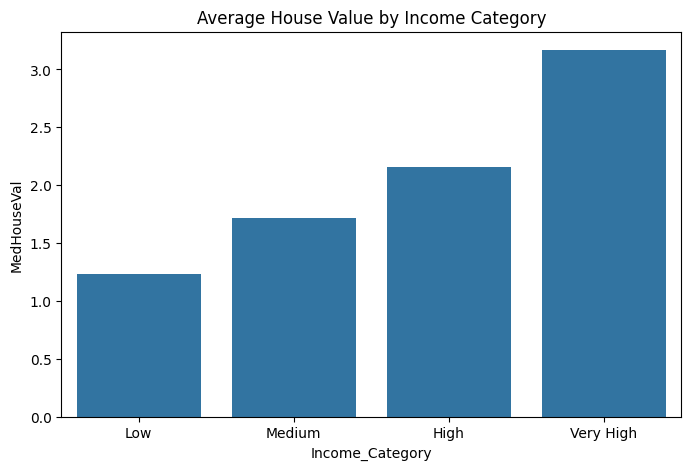

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="Income_Category", y="MedHouseVal", data=df, estimator=np.mean, errorbar=None)
plt.title("Average House Value by Income Category")
plt.show()

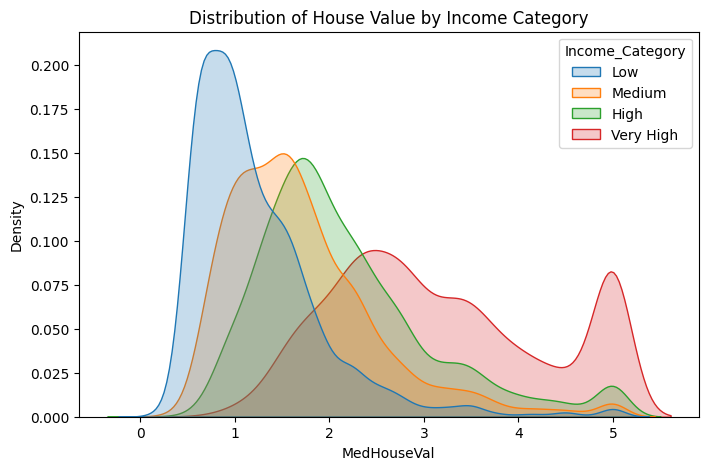

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="MedHouseVal", hue="Income_Category", fill=True)
plt.title("Distribution of House Value by Income Category")
plt.show()

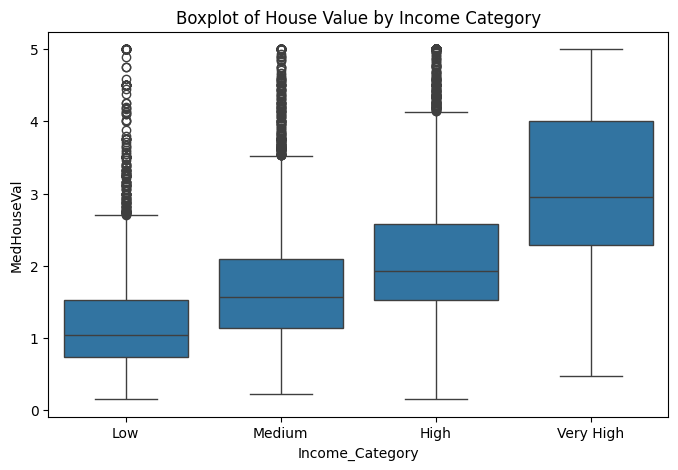

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Income_Category", y="MedHouseVal", data=df)
plt.title("Boxplot of House Value by Income Category")
plt.show()


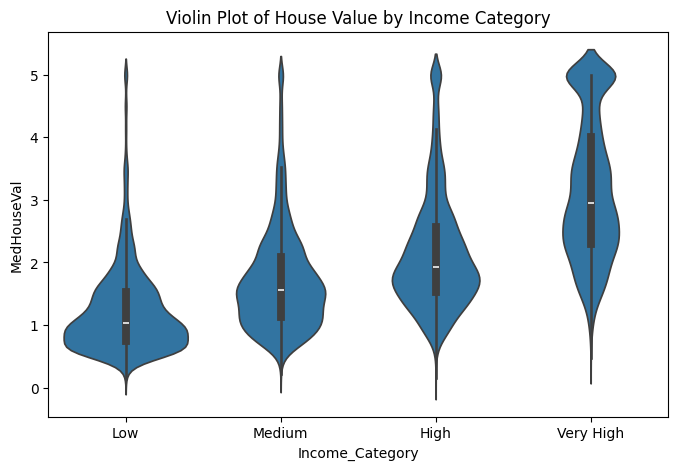

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Income_Category", y="MedHouseVal", data=df)
plt.title("Violin Plot of House Value by Income Category")
plt.show()

/usr/local/lib/python3.12/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1000x600 with 0 Axes>

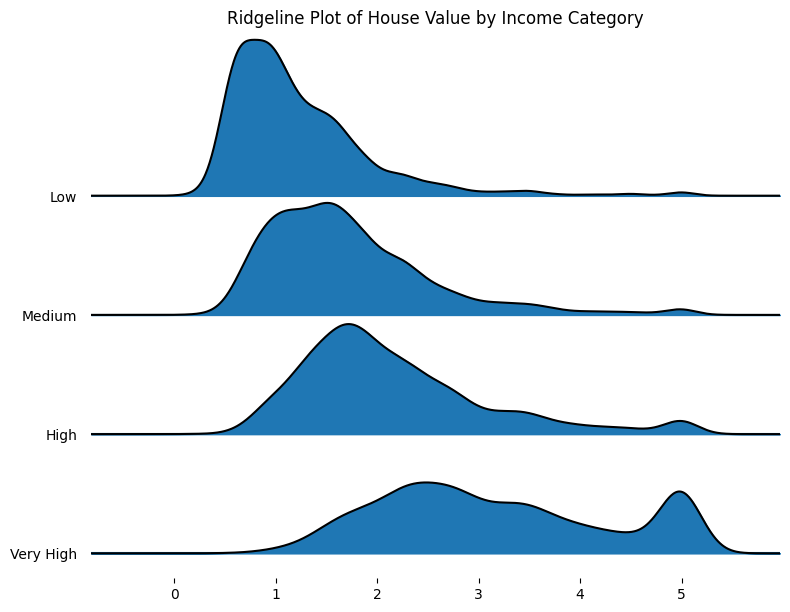

In [ ]:

# Ridgeline Plot (Joyplot) for House Value
plt.figure(figsize=(10,6))
joypy.joyplot(df, by="Income_Category", column="MedHouseVal", figsize=(8,6))
plt.title("Ridgeline Plot of House Value by Income Category")
plt.show()

In [ ]:
# Beeswarm Plot
(
    so.Plot(df, x="Income_Category", y="MedHouseVal")
    .add(so.Dots(jitter=0.5, alpha=0.5))
    .label(title="Beeswarm Plot of House Value by Income Category")
    .show()
)


TypeError: Dots.__init__() got an unexpected keyword argument 'jitter'

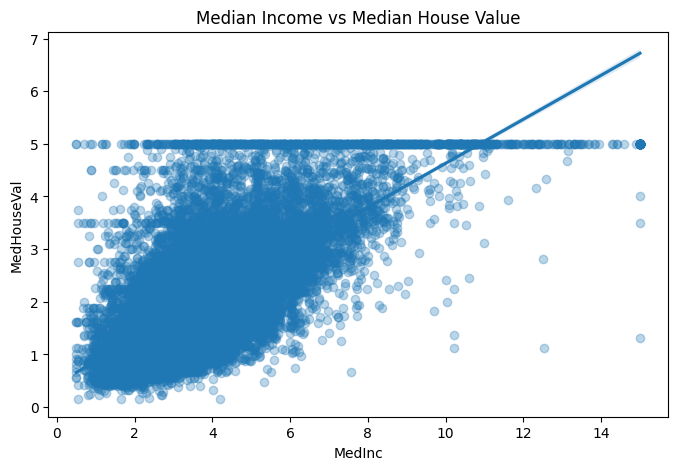

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x="MedInc", y="MedHouseVal", data=df, scatter_kws={"alpha":0.3})
plt.title("Median Income vs Median House Value")
plt.show()

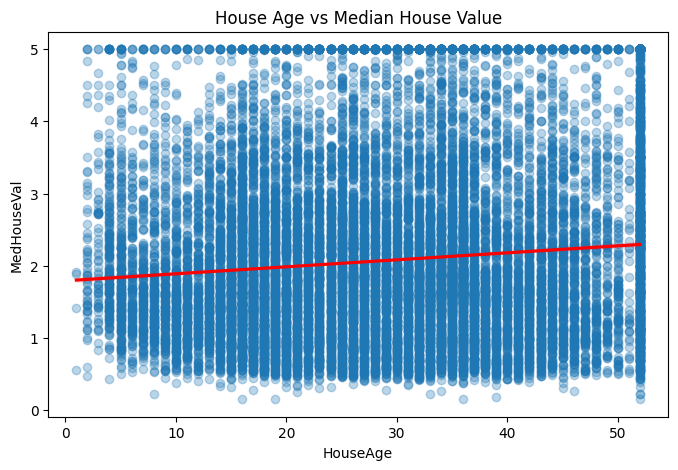

In [ ]:
# Scatterplot: House Age vs House Value
plt.figure(figsize=(8,5))
sns.regplot(x="HouseAge", y="MedHouseVal", data=df, scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("House Age vs Median House Value")
plt.show()


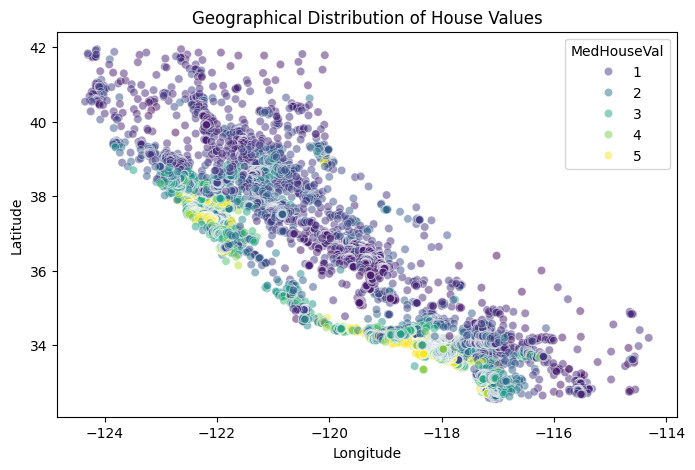

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Longitude", y="Latitude", hue="MedHouseVal", data=df, palette="viridis", alpha=0.5)
plt.title("Geographical Distribution of House Values")
plt.show()
